In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import string
import nltk  

In [26]:
df = pd.read_csv('twitter_training.csv') 

In [27]:
df 

,number,company,emotions,comments
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [28]:
df['comments'] = df['comments'].str.replace("[a-zA-Z#]"," ")
df.head() 

C:\Users\ACER\AppData\Local\Temp\ipykernel_15200\3639237331.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comments'] = df['comments'].str.replace("[a-zA-Z#]"," ")


,number,company,emotions,comments
0,2401,Borderlands,Positive,...
1,2401,Borderlands,Positive,...
2,2401,Borderlands,Positive,...
3,2401,Borderlands,Positive,...
4,2401,Borderlands,Positive,2 ...


In [29]:
df['comments'] = df ['comments'].astype(str)

In [33]:
df['comments'] = df['comments'].fillna('')

In [34]:
#individual words considered as token
tokenized_tweets =df['comments'].apply(lambda x: x.split())

In [35]:
tokenized_tweets.head()

0       [,]
1       [,]
2       [,]
3       [,]
4    [2, ,]
Name: comments, dtype: object

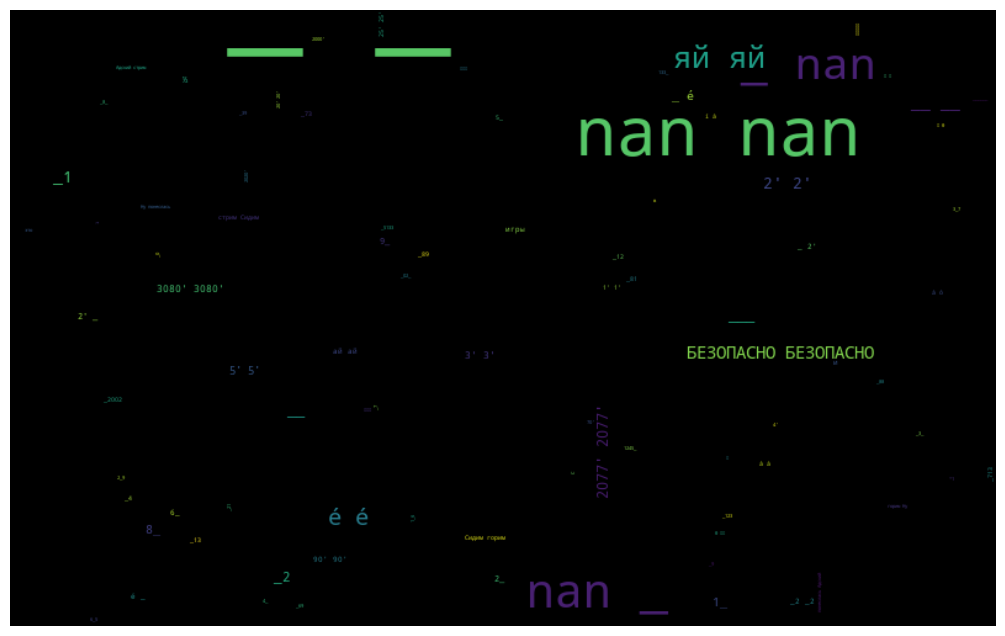

In [40]:
!pip install wordcloud
from wordcloud import WordCloud
all_words= " " .join([sentence for sentence in df ['comments' ]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() 

In [42]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    74682 non-null  int64 
 1   company   74682 non-null  object
 2   emotions  74682 non-null  object
 3   comments  74682 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Text(0, 0.5, 'Count')

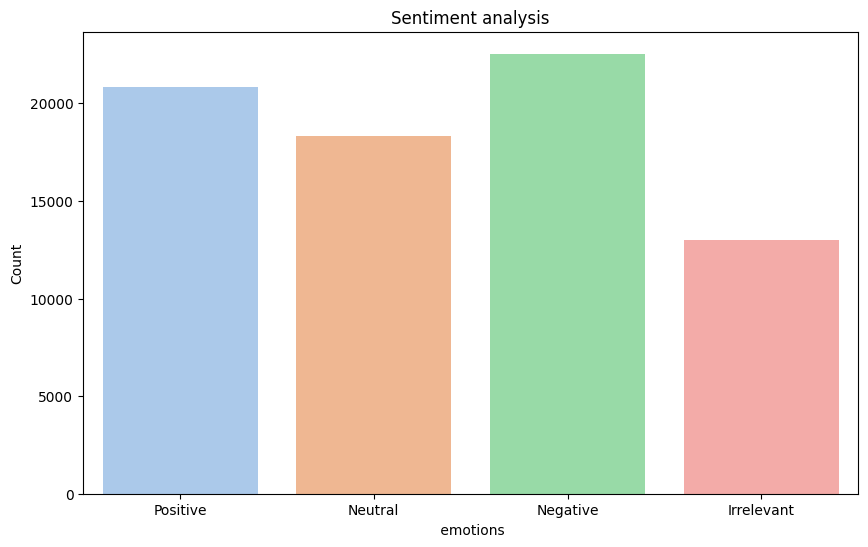

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x='emotions', data=df, palette= 'pastel', legend=False, hue='emotions')
plt.title('Sentiment analysis')
plt.xlabel(' emotions')
plt.ylabel('Count')

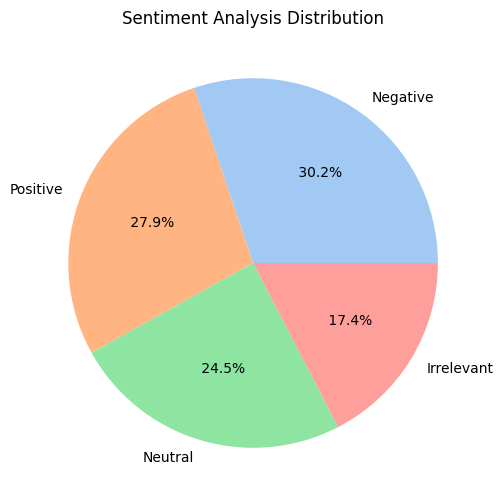

In [44]:
#pie
emotion_counts =df['emotions'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='% 1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sentiment Analysis Distribution')
plt.show() 

In [45]:
df.describe()

,number
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000
